In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

%matplotlib inline  

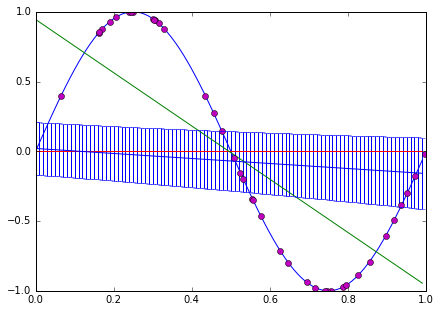

In [2]:
x = np.arange(0,1,0.01)
f = np.sin(2*np.pi*x)
g1 = 0 * x;

w = np.polyfit(x,f,1);
g2 = np.polyval(w,x);

plt.figure(1, figsize=(7,5));
plt.plot(x,f, color="blue");
plt.plot(x,g1, color="red");
plt.plot(x,g2, color="green");

e1 = np.mean(np.dot((g1-f),(g1-f)));
e2 = np.mean(np.dot((g2-f),(g2-f)));

# number of observations
D = 10;
trainingCaseG1 = np.zeros((D, 100));
trainingCaseG2 = np.zeros((D, 100));
trainingCaseG3 = np.zeros((D, 100));

for i in range(D):
    trainingCaseX = np.random.uniform(0,1,2);
    trainingCaseF = np.sin(2*np.pi*trainingCaseX);
    plt.plot(trainingCaseX,trainingCaseF, 'mo'); 
    
    trainingCaseX = np.random.uniform(0,1,2);
    trainingCaseF = np.sin(2*np.pi*trainingCaseX);
    plt.plot(trainingCaseX,trainingCaseF, 'mo'); 

    w = np.polyfit(trainingCaseX, trainingCaseF,1);
    tempTrainingCaseX = np.zeros((2,2));
    tempTrainingCaseX[0,:] = trainingCaseX;
    tempTrainingCaseX[1,:] = [1,1];
    randa = 1;

    w = np.dot(np.transpose(np.dot(inv(np.dot(np.transpose(tempTrainingCaseX),tempTrainingCaseX) + randa + np.eye(2)), np.transpose(tempTrainingCaseX))), np.transpose(trainingCaseF));
    tempX = np.zeros((2,np.size(x)));
    tempX[0,:] = x;

    for j in range(np.size(x)):
        tempX[1,j] = 1;
    trainingCaseG3[i,:] = np.transpose(np.dot(np.transpose(w),tempX));

    # First Degree Line
    w = np.polyfit(trainingCaseX, trainingCaseF, 1);
    trainingCaseG2[i,:] = np.polyval(w,x);

    # Zero Degree Line
    w = np.polyfit(trainingCaseX, trainingCaseF, 0);
    trainingCaseG1[i,:] = np.polyval(w,x);
    
meanG1 = np.zeros((np.size(x),1));
meanG2 = np.zeros((np.size(x),1));
meanG3 = np.zeros((np.size(x),1));

stdG1 = np.zeros((np.size(x),1));
stdG2 = np.zeros((np.size(x),1));
stdG3 = np.zeros((np.size(x),1));

biasXG1 = np.zeros((np.size(x),1));
biasXG2 = np.zeros((np.size(x),1));
biasXG3 = np.zeros((np.size(x),1));
    
for j in range(np.size(x)):
    meanG1[j] = np.mean(trainingCaseG1[:,j]);
    stdG1[j] = np.std(trainingCaseG1[:,j]);
    biasXG1[j] = (meanG1[j] - f[j])*(meanG1[j] - f[j]);
    
    meanG2[j] = np.mean(trainingCaseG2[:,j]);
    stdG2[j] = np.std(trainingCaseG2[:,j]);
    biasXG2[j] = (meanG2[j] - f[j])*(meanG2[j] - f[j]);
    
    meanG3[j] = np.mean(trainingCaseG3[:,j]);
    stdG3[j] = np.std(trainingCaseG3[:,j]);
    biasXG3[j] = (meanG3[j] - f[j])*(meanG3[j] - f[j]);
    
plt.errorbar(x,meanG3, yerr = stdG3);

deviationG1 = np.zeros((np.size(x), D));
deviationG2 = np.zeros((np.size(x), D));
deviationG3 = np.zeros((np.size(x), D));

for i in range(np.size(x)):
    for j in range(D):
        deviationG1[i,j] = (trainingCaseG1[j,i] - meanG1[i]) * (trainingCaseG1[j,i] - meanG1[i]);
        deviationG2[i,j] = (trainingCaseG2[j,i] - meanG2[i]) * (trainingCaseG2[j,i] - meanG2[i]);
        deviationG3[i,j] = (trainingCaseG3[j,i] - meanG3[i]) * (trainingCaseG3[j,i] - meanG3[i]);
        
biasG1 = 0; biasG2 = 0; biasG3 = 0;
varG1 = 0; varG2 = 0; varG3 = 0;
        
biasG1 = np.mean(biasG1);
biasG2 = np.mean(biasG2);
biasG2 = np.mean(biasG3);

varG1 = np.mean(np.mean(deviationG1));
varG2 = np.mean(np.mean(deviationG2));
varG3 = np.mean(np.mean(deviationG3));

plt.show();